In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing

from scipy.spatial.distance import cdist
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AffinityPropagation

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
# Read and import data
boston_marathon_results = pd.read_csv('results 2013.csv')
boston_marathon_results.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
boston_marathon_results.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [5]:
boston_marathon_scores = boston_marathon_results.drop(['city','country', 'genderdiv', 'bib', 'ctz', 'state', 'name', 'division'], axis = 1)

In [6]:
boston_marathon_scores.replace('-', 0, inplace=True)
boston_marathon_scores['gender'] = boston_marathon_scores.loc[:, 'gender'].map({'F': 0,'M': 1})
print(boston_marathon_scores.columns.unique())
boston_marathon_scores.head()

Index(['25k', 'age', '10k', 'gender', 'half', 'official', 'overall', 'pace',
       '30k', '5k', '20k', '35k', '40k'],
      dtype='object')


,25k,age,10k,gender,half,official,overall,pace,30k,5k,20k,35k,40k
0,49.87,28,18.18,1,40.93,90.90,9,3.47,62.07,8.90,38.80,74.73,85.55
1,77.27,30,30.90,1,64.90,132.50,5,5.07,92.97,15.90,61.52,108.78,124.77
2,77.23,23,30.90,1,64.92,130.37,1,4.98,92.72,15.93,61.53,108.68,123.78
3,50.50,32,18.73,1,42.00,88.43,5,3.38,61.35,8.98,39.88,73.00,83.43
4,48.75,39,18.18,1,40.57,87.22,3,3.33,59.92,8.92,38.55,71.68,81.88


In [7]:
boston_marathon_scores = boston_marathon_scores.astype(float)
boston_marathon_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 13 columns):
25k         16164 non-null float64
age         16164 non-null float64
10k         16164 non-null float64
gender      16164 non-null float64
half        16164 non-null float64
official    16164 non-null float64
overall     16164 non-null float64
pace        16164 non-null float64
30k         16164 non-null float64
5k          16164 non-null float64
20k         16164 non-null float64
35k         16164 non-null float64
40k         16164 non-null float64
dtypes: float64(13)
memory usage: 1.6 MB


In [8]:
#Make a copy of DF
X_tr = boston_marathon_scores

#Standardize
clmns = ['age', 'official','40k', '35k', '30k', '25k', 'half', '20k', '10k', '5k', 'pace']

X_tr_std = normalize(X_tr[clmns])

***Compare Spectral Clustering against kMeans using Similarity***

As there is no ground truth, the criteria used to evaluate clusters produced using Spectral and kmeans is the silhouette coefficient. From the results obtained, it can be appreaciated that Spectral Clustering requires 6 clusters to have the silhouette score similar to the one obtained with 3 clusters with kmeans.

In [19]:
#Compare from a silhouette_score perspective kmeans against Spectral Clustering
range_n_clusters = np.arange(10)+2

for n_clusters in range_n_clusters:
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    spec_clust = SpectralClustering(n_clusters=n_clusters)
    cluster_labels1 = spec_clust.fit_predict(X_tr_std)    
    silhouette_avg1 = silhouette_score(X_tr_std, cluster_labels1)
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10).fit(X_tr_std)
    cluster_labels2 = kmeans.fit_predict(X_tr_std)    
    silhouette_avg2 = silhouette_score(X_tr_std, cluster_labels2)
    
    print("For n_clusters =", n_clusters,
          "av. sil_score for Spec. clust is :", silhouette_avg1,
         "av. sil_score for kmeans is :",silhouette_avg2 )

For n_clusters = 2 av. sil_score for Spec. clust is : 0.961171331526 av. sil_score for kmeans is : 0.960595115442
For n_clusters = 3 av. sil_score for Spec. clust is : 0.387076810597 av. sil_score for kmeans is : 0.388209250616
For n_clusters = 4 av. sil_score for Spec. clust is : 0.388415111093 av. sil_score for kmeans is : 0.396003681008
For n_clusters = 5 av. sil_score for Spec. clust is : 0.389380079665 av. sil_score for kmeans is : 0.397697024637
For n_clusters = 6 av. sil_score for Spec. clust is : 0.390484776573 av. sil_score for kmeans is : 0.329749119438
For n_clusters = 7 av. sil_score for Spec. clust is : 0.385483467461 av. sil_score for kmeans is : 0.332703384807
For n_clusters = 8 av. sil_score for Spec. clust is : 0.384559772179 av. sil_score for kmeans is : 0.335751771772
For n_clusters = 9 av. sil_score for Spec. clust is : 0.386544891208 av. sil_score for kmeans is : 0.336687926662
For n_clusters = 10 av. sil_score for Spec. clust is : 0.379711180133 av. sil_score for 

the optimal number of kmeans will be determined using the elbow method. Once the kmeans number of clusters is set, the number of clusters using spectral clustering will be used so that it equals the silhouette score obtained in the first case.

***K-Means***

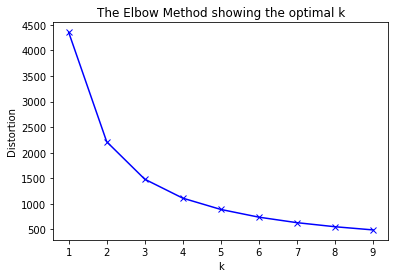

In [9]:
#Use the elbow method to determine the number of clusters
# k-means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_tr)
    kmeanModel.fit(X_tr)
    distortions.append(sum(np.min(cdist(X_tr, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_tr.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method shows that the optimal number of clusters to be used in the kmeans method is 3, considering the euclidean distance between cluster centers. From an analytical perspective, the inertia functions shows the same results: 3 clusters were the difference between the results obtained by the inertia function are smaller when shifting from 3 to 4 clusters.

In [10]:
#Evaluate the best number of clusters
for i in range(1,10):
 km = KMeans(n_clusters=i, init='k-means++', n_init=10).fit(X_tr_std)
 print (i, km.inertia_)

1 30.1263346974
2 19.0457804842
3 13.188426726
4 11.2720106651
5 9.93710134099
6 8.54109431453
7 7.47659624147
8 6.8543306694
9 6.17804693014


In [59]:
#Cluster the data
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10).fit(X_tr_std)
labels = kmeans.labels_

#Glue back to original data
X_tr['clusters'] = labels
X_tr['Gender'] = boston_marathon_scores.gender
X_tr['Overall'] = boston_marathon_scores.overall

#Add the column into our list
clmns.extend(['clusters','Gender','Overall'])

#Lets analyze the clusters
pd.DataFrame(X_tr.groupby(['clusters']).mean())

,25k,age,10k,gender,half,official,overall,pace,30k,5k,20k,35k,40k,Gender,Overall
clusters,,,,,,,,,,,,,,,
0,118.229587,33.293590,46.701476,0.386324,99.217164,208.662765,8523.313127,7.966590,143.787377,23.352465,94.031163,170.262460,197.110309,0.386324,8523.313127
1,0.000000,41.857143,14.568571,0.500000,14.730000,220.382143,11327.642857,8.412857,10.755714,9.150714,13.962143,0.000000,14.455000,0.500000,11327.642857
2,118.059351,48.824824,46.667129,0.782068,99.197408,207.706291,8343.792325,7.930118,143.326589,23.332466,94.015637,169.582073,195.992275,0.782068,8343.792325


In [60]:
clusters_summary = X_tr.groupby(['clusters']).describe()
clusters_summary_transposed = clusters_summary.transpose()
clusters_summary_transposed

clusters                   0             1             2
10k      count   7473.000000     14.000000   8677.000000
         mean      46.701476     14.568571     46.667129
         std        5.086413     23.947241      5.160402
         min        0.000000      0.000000      0.000000
         25%       42.880000      0.000000     43.470000
         50%       47.420000      0.000000     46.950000
         75%       50.400000     36.090000     50.120000
         max       66.680000     53.570000     61.580000
20k      count   7473.000000     14.000000   8677.000000
         mean      94.031163     13.962143     94.015637
         std       10.168686     35.492962     10.030560
         min        0.000000      0.000000      0.000000
         25%       85.950000      0.000000     87.320000
         50%       95.430000      0.000000     94.450000
         75%      101.480000      0.000000    101.000000
         max      131.720000     98.650000    123.180000
25k      count   7473.000000     14.000000   8677.000000
         mean     118.229587      0.000000    118.059351
         std       13.036739      0.000000     12.914815
         min        0.000000      0.000000      0.000000
         25%      108.130000      0.000000    109.600000
         50%      120.100000      0.000000    118.570000
         75%      127.580000      0.000000    127.050000
         max      163.620000      0.000000    158.550000
30k      count   7473.000000     14.000000   8677.000000
         mean     143.787377     10.755714    143.326589
         std       15.833160     40.244198     15.838780
         min       68.220000      0.000000      0.000000
         25%      131.230000      0.000000    132.920000
         50%      145.900000      0.000000    143.820000
...                      ...           ...           ...
half     std       10.737139     37.444634     10.539430
         min        0.000000      0.000000      0.000000
         25%       90.680000      0.000000     92.130000
         50%      100.750000      0.000000     99.650000
         75%      107.100000      0.000000    106.580000
         max      138.670000    104.000000    129.880000
official count   7473.000000     14.000000   8677.000000
         mean     208.662765    220.382143    207.706291
         std       23.933593     18.144768     23.574875
         min       97.580000    173.580000     85.530000
         25%      191.530000    214.842500    191.780000
         50%      210.420000    224.450000    208.170000
         75%      225.220000    230.722500    225.200000
         max      284.230000    245.450000    281.600000
overall  count   7473.000000     14.000000   8677.000000
         mean    8523.313127  11327.642857   8343.792325
         std     5116.560194   4217.833651   4994.673736
         min        1.000000   1114.000000      1.000000
         25%     4030.000000   9781.250000   4071.000000
         50%     8581.000000  12472.500000   7924.000000
         75%    12661.000000  14006.250000  12655.000000
         max    17598.000000  16825.000000  17596.000000
pace     count   7473.000000     14.000000   8677.000000
         mean       7.966590      8.412857      7.930118
         std        0.912951      0.690935      0.899336
         min        3.730000      6.630000      3.270000
         25%        7.320000      8.197500      7.320000
         50%        8.030000      8.565000      7.950000
         75%        8.600000      8.802500      8.600000
         max       10.850000      9.370000     10.750000

[120 rows x 3 columns]

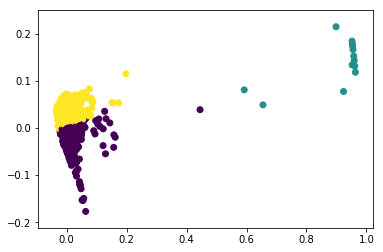

In [61]:
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_tr_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [62]:
Graph_kmeans_official = pd.pivot_table(X_tr, 'official', ['clusters', 'gender'])
Graph_kmeans_pace = pd.pivot_table(X_tr, 'pace', ['clusters', 'gender'])
Graph_kmeans_age = pd.pivot_table(X_tr, 'age', ['clusters', 'gender'])
print(Graph_kmeans_official, Graph_kmeans_pace, Graph_kmeans_age)

                   official
clusters gender            
0        0.0     218.637580
         1.0     192.817769
1        0.0     223.532857
         1.0     217.231429
2        0.0     222.032644
         1.0     203.714082                      pace
clusters gender          
0        0.0     8.347072
         1.0     7.362196
1        0.0     8.534286
         1.0     8.291429
2        0.0     8.476526
         1.0     7.777854                        age
clusters gender           
0        0.0     34.193197
         1.0     31.864565
1        0.0     40.142857
         1.0     43.571429
2        0.0     48.960338
         1.0     48.787062


***Spectral Clustering***

In [15]:
# We know we're looking for 6 clusters from the comparison with the kmeans.
n_clusters=6

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters).fit(X_tr_std)

# Extract cluster assignments for each data point.
labels = sc.labels_

#Glue back to original data
X_tr['clusters'] = labels
X_tr['Gender'] = boston_marathon_scores.gender
X_tr['Overall'] = boston_marathon_scores.overall

#Add the column into our list
clmns.extend(['clusters','Gender','Overall'])

#Lets analyze the clusters

pd.DataFrame(X_tr.groupby(['clusters']).mean())

,25k,age,10k,gender,half,official,overall,pace,30k,5k,20k,35k,40k,Gender,Overall
clusters,,,,,,,,,,,,,,,
0,117.848578,49.104459,46.705808,0.777035,99.082917,205.460250,7864.603982,7.844473,142.773846,23.347735,93.929491,168.457354,194.105159,0.777035,7864.603982
1,118.205056,33.151903,46.951070,0.348409,99.416279,205.273537,7829.390674,7.837257,143.102483,23.508974,94.253910,168.663509,194.152764,0.348409,7829.390674
2,0.000000,40.416667,12.936667,0.416667,8.518333,220.857500,11460.166667,8.430833,0.000000,8.661667,8.068333,0.000000,0.000000,0.416667,11460.166667
3,31.868571,39.928571,42.200000,0.785714,89.550714,204.827143,7637.428571,7.820000,141.996429,22.919286,84.792143,155.258571,126.517143,0.785714,7637.428571
4,130.341429,45.428571,50.031429,0.571429,108.240000,236.570000,14046.285714,9.030000,161.281429,21.010000,102.022857,0.000000,223.585714,0.571429,14046.285714
5,119.219489,41.503353,45.890427,0.724225,99.013487,224.082938,11750.388935,8.554849,146.968906,22.873650,93.681865,178.077615,210.484363,0.724225,11750.388935


In [16]:
clusters_summary = X_tr.groupby(['clusters']).describe()
clusters_summary_transposed = clusters_summary.transpose()
clusters_summary_transposed

clusters                   0             1             2             3  \
10k      count   7333.000000   6412.000000     12.000000     14.000000   
         mean      46.705808     46.951070     12.936667     42.200000   
         std        5.067477      4.974319     23.441598     12.654792   
         min        0.000000     21.400000      0.000000      0.000000   
         25%       43.420000     42.977500      0.000000     43.435000   
         50%       46.980000     47.750000      0.000000     45.020000   
         75%       50.180000     50.600000     12.030000     47.632500   
         max       61.580000     66.680000     53.570000     51.800000   
20k      count   7333.000000   6412.000000     12.000000     14.000000   
         mean      93.929491     94.253910      8.068333     84.792143   
         std       10.114733     10.079694     27.949527     25.409862   
         min       38.230000     44.380000      0.000000      0.000000   
         25%       87.120000     85.950000      0.000000     87.247500   
         50%       94.370000     95.890000      0.000000     90.400000   
         75%      101.030000    101.600000      0.000000     95.192500   
         max      123.180000    131.720000     96.820000    103.920000   
25k      count   7333.000000   6412.000000     12.000000     14.000000   
         mean     117.848578    118.205056      0.000000     31.868571   
         std       12.791647     12.783019      0.000000     52.296443   
         min       48.320000     56.050000      0.000000      0.000000   
         25%      109.220000    107.715000      0.000000      0.000000   
         50%      118.320000    120.260000      0.000000      0.000000   
         75%      126.850000    127.470000      0.000000     82.575000   
         max      153.480000    163.620000      0.000000    113.350000   
30k      count   7333.000000   6412.000000     12.000000     14.000000   
         mean     142.773846    143.102483      0.000000    141.996429   
         std       15.661068     15.694454      0.000000     13.742250   
         min       59.450000     68.220000      0.000000    113.600000   
         25%      132.220000    130.420000      0.000000    134.082500   
         50%      143.230000    145.520000      0.000000    139.625000   
...                      ...           ...           ...           ...   
half     std       10.678470     10.639831     29.508372     26.845829   
         min       40.270000     46.720000      0.000000      0.000000   
         25%       91.900000     90.645000      0.000000     92.120000   
         50%       99.530000    101.180000      0.000000     95.275000   
         75%      106.600000    107.180000      0.000000    100.762500   
         max      129.880000    138.670000    102.220000    109.670000   
official count   7333.000000   6412.000000     12.000000     14.000000   
         mean     205.460250    205.273537    220.857500    204.827143   
         std       22.892748     22.731726     19.680258     20.528396   
         min       85.530000     97.580000    173.580000    162.000000   
         25%      190.280000    187.837500    212.997500    191.492500   
         50%      205.850000    208.210000    225.400000    205.635000   
         75%      222.080000    221.600000    231.710000    219.295000   
         max      269.550000    278.000000    245.450000    238.220000   
overall  count   7333.000000   6412.000000     12.000000     14.000000   
         mean    7864.603982   7829.390674  11460.166667   7637.428571   
         std     4834.454210   4911.403729   4570.114716   4612.962167   
         min        1.000000      1.000000   1114.000000    346.000000   
         25%     3790.000000   3326.000000   9272.750000   4024.000000   
         50%     7326.000000   7938.000000  12716.000000   7252.000000   
         75%    11858.000000  11740.250000  14245.000000  11069.250000   
         max    17568.000000  17589.000000  16825.000000  15721.000000   
pace

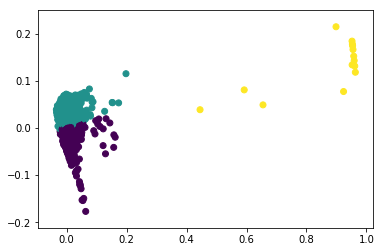

In [63]:
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_tr_std)

# Calculate predicted values.

y_pred = SpectralClustering(n_clusters=3).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

***Mean Shift***

In [24]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_tr_std, quantile=0.9)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_tr_std)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

#Glue back to original data
X_tr['clusters'] = labels
X_tr['Gender'] = boston_marathon_scores.gender
X_tr['Overall'] = boston_marathon_scores.overall

#Add the column into our list
clmns.extend(['clusters','Gender','Overall'])

#Lets analyze the clusters
print("Number of estimated clusters: {}".format(n_clusters_))
pd.DataFrame(X_tr.groupby(['clusters']).mean())

Number of estimated clusters: 18


,25k,age,10k,gender,half,official,overall,pace,30k,5k,20k,35k,40k,Gender,Overall
clusters,,,,,,,,,,,,,,,
0,118.195629,41.634089,46.729067,0.599007,99.225182,208.131799,8423.401304,7.946343,143.564142,23.349711,94.047516,169.965941,196.538315,0.599007,8423.401304
1,123.384286,45.357143,0.000000,0.571429,103.810000,216.680000,10269.571429,8.272857,149.630714,17.516429,98.415000,177.007857,204.820000,0.571429,10269.571429
2,0.000000,39.500000,0.000000,0.500000,0.000000,219.632500,11138.875000,8.385000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,11138.875000
3,0.000000,41.750000,45.547500,0.750000,96.765000,205.925000,8088.750000,7.860000,142.660000,22.890000,91.538750,168.860000,194.555000,0.750000,8088.750000
4,130.341429,45.428571,50.031429,0.571429,108.240000,236.570000,14046.285714,9.030000,161.281429,21.010000,102.022857,0.000000,223.585714,0.571429,14046.285714
5,111.540000,39.500000,44.425000,0.750000,93.897500,193.430000,4521.000000,7.387500,135.355000,22.262500,89.032500,159.577500,0.000000,0.750000,4521.000000
6,119.052500,46.750000,46.847500,0.500000,99.985000,214.370000,9688.500000,8.185000,0.000000,23.267500,94.575000,173.530000,202.502500,0.500000,9688.500000
7,115.956667,41.000000,45.010000,0.333333,0.000000,205.583333,8294.333333,7.856667,141.570000,22.523333,91.533333,167.580000,193.983333,0.333333,8294.333333
8,121.625000,41.500000,48.775000,0.500000,102.750000,205.265000,8105.500000,7.835000,145.960000,24.650000,0.000000,170.645000,194.890000,0.500000,8105.500000


In [21]:
clusters_summary = X_tr.groupby(['clusters']).describe()
clusters_summary_transposed = clusters_summary.transpose()
clusters_summary_transposed

clusters                  0             1             2             3   \
10k      count  16105.000000     10.000000      8.000000      7.000000   
         mean      46.729067      0.000000      0.000000     45.501429   
         std        4.914671      0.000000      0.000000      4.923442   
         min       18.030000      0.000000      0.000000     36.900000   
         25%       43.220000      0.000000      0.000000     43.485000   
         50%       47.170000      0.000000      0.000000     45.420000   
         75%       50.280000      0.000000      0.000000     48.710000   
         max       66.680000      0.000000      0.000000     51.800000   
20k      count  16105.000000     10.000000      8.000000      7.000000   
         mean      94.047516     98.301000      0.000000     91.482857   
         std        9.963129      7.606121      0.000000      9.712080   
         min       38.230000     81.900000      0.000000     74.980000   
         25%       86.770000     94.292500      0.000000     86.975000   
         50%       94.870000     98.775000      0.000000     91.630000   
         75%      101.270000    104.217500      0.000000     97.950000   
         max      131.720000    106.870000      0.000000    103.920000   
25k      count  16105.000000     10.000000      8.000000      7.000000   
         mean     118.195629    123.299000      0.000000      0.000000   
         std       12.674378      9.617818      0.000000      0.000000   
         min       48.320000    102.830000      0.000000      0.000000   
         25%      108.920000    118.290000      0.000000      0.000000   
         50%      119.180000    123.420000      0.000000      0.000000   
         75%      127.330000    131.315000      0.000000      0.000000   
         max      163.620000    134.000000      0.000000      0.000000   
30k      count  16105.000000     10.000000      8.000000      7.000000   
         mean     143.564142    149.453000      0.000000    139.261429   
         std       15.677899     11.785741      0.000000     15.166610   
         min       59.450000    125.330000      0.000000    113.600000   
         25%      132.200000    142.905000      0.000000    131.375000   
         50%      144.730000    149.165000      0.000000    142.350000   
...                      ...           ...           ...           ...   
half     std       10.521256      8.028551      0.000000     10.297575   
         min       40.270000     86.330000      0.000000     79.100000   
         25%       91.550000     99.520000      0.000000     91.685000   
         50%      100.100000    104.130000      0.000000     96.680000   
         75%      106.850000    109.995000      0.000000    103.450000   
         max      138.670000    112.700000      0.000000    109.670000   
official count  16105.000000     10.000000      8.000000      7.000000   
         mean     208.131799    217.303000    219.632500    201.311429   
         std       23.747320     15.328319     24.220754     21.732860   
         min       85.530000    194.170000    173.580000    162.000000   
         25%      191.700000    205.922500    207.037500    191.105000   
         50%      209.220000    215.690000    227.515000    207.500000   
         75%      225.200000    226.117500    234.637500    216.025000   
         max      284.230000    242.780000    245.450000    225.420000   
overall  count  16105.000000     10.000000      8.000000      7.000000   
         mean    8423.401304  10399.700000  11138.875000   6998.428571   
         std     5052.028950   3920.898283   5586.997518   4438.780270   
         min        1.000000   4559.000000   1114.000000    346.000000   
         25%     4055.000000   7360.250000   7676.500000   3945.500000   
         50%     8241.000000  10063.000000  13220.000000   7741.000000   
         75%    12655.000000  12885.500000  14851.000000  10145.500000   
         max    17598.000000  16503.000000  16825.000000  12720.000000   
pace

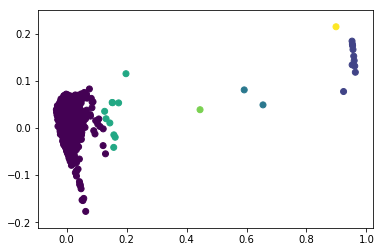

In [25]:
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_tr_std)

# Calculate predicted values.
bandwidth = estimate_bandwidth(X_tr_std, quantile=0.9)
y_pred = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [17]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_tr_std)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

#Glue back to original data
X_tr['clusters'] = labels
X_tr['Gender'] = boston_marathon_scores.gender
X_tr['Overall'] = boston_marathon_scores.overall

#Add the column into our list
clmns.extend(['clusters','Gender','Overall'])

#Lets analyze the clusters
print("Number of estimated clusters: {}".format(n_clusters_))
pd.DataFrame(X_tr.groupby(['clusters']).mean())

Done
Number of estimated clusters: 251


,25k,age,10k,gender,half,official,overall,pace,30k,5k,20k,35k,40k,Gender,Overall
clusters,,,,,,,,,,,,,,,
0,51.880000,43.000000,19.148000,1.000000,43.080000,92.754000,9.400000,3.542000,63.870000,9.226000,40.898000,76.494000,87.242000,1.000000,9.400000
1,58.814286,38.142857,21.591429,0.857143,48.728571,107.681429,22.428571,4.115714,73.342857,10.270000,46.268571,88.742857,101.232857,0.857143,22.428571
2,79.596667,42.555556,29.865556,0.888889,65.995556,144.394444,3486.333333,5.512222,99.325556,14.605556,62.567778,119.272222,136.260000,0.888889,3486.333333
3,51.017500,49.500000,19.212500,1.000000,42.605000,90.327500,7.750000,3.452500,62.542500,9.290000,40.477500,74.807500,85.082500,1.000000,7.750000
4,57.156000,41.000000,21.306000,0.800000,47.652000,101.820000,20.400000,3.888000,70.392000,10.136000,45.276000,84.248000,95.932000,0.800000,20.400000
5,131.848333,45.000000,44.376667,0.833333,99.755000,233.056667,13954.666667,8.898333,164.263333,22.131667,93.786667,193.041667,221.220000,0.833333,13954.666667
6,0.000000,37.000000,43.683333,0.666667,92.746667,192.650000,5635.333333,7.353333,133.676667,21.993333,87.916667,157.470000,181.750000,0.666667,5635.333333
7,105.182083,60.541667,41.791667,0.958333,88.628333,180.174167,2933.500000,6.880833,126.957083,20.949583,84.047500,148.961667,170.547500,0.958333,2933.500000
8,110.972500,58.535714,44.063214,0.964286,93.403929,191.054107,4668.089286,7.294643,134.142857,22.101607,88.561964,157.621964,180.764821,0.964286,4668.089286


In [18]:
clusters_summary = X_tr.groupby(['clusters']).describe()
clusters_summary_transposed = clusters_summary.transpose()
clusters_summary_transposed

clusters               0           1             2          3           4    \
10k      count    5.000000    7.000000      9.000000   4.000000    5.000000   
         mean    19.148000   21.591429     29.865556  19.212500   21.306000   
         std      1.170543    3.465484     12.856572   1.027696    1.654004   
         min     18.180000   18.200000     18.180000  18.030000   19.770000   
         25%     18.180000   19.250000     19.780000  18.555000   19.770000   
         50%     18.730000   20.780000     23.580000  19.250000   20.900000   
         75%     19.750000   22.655000     41.500000  19.907500   22.970000   
         max     20.900000   28.350000     52.350000  20.320000   23.120000   
20k      count    5.000000    7.000000      9.000000   4.000000    5.000000   
         mean    40.898000   46.268571     62.567778  40.477500   45.276000   
         std      2.917074    8.611826     26.296880   1.778490    3.058648   
         min     38.550000   38.800000     38.550000  38.230000   41.700000   
         25%     38.570000   40.825000     42.020000  39.467500   43.870000   
         50%     39.870000   43.900000     50.870000  40.825000   43.900000   
         75%     42.050000   47.725000     84.580000  41.835000   47.930000   
         max     45.450000   64.080000    110.870000  42.030000   48.980000   
25k      count    5.000000    7.000000      9.000000   4.000000    5.000000   
         mean    51.880000   58.814286     79.596667  51.017500   57.156000   
         std      4.016118   11.045453     33.893913   2.058517    3.769235   
         min     48.750000   49.870000     48.750000  48.320000   52.620000   
         25%     48.750000   51.565000     53.080000  49.955000   55.600000   
         50%     50.500000   55.600000     63.830000  51.560000   55.630000   
         75%     53.070000   60.690000    107.280000  52.622500   59.850000   
         max     58.330000   81.720000    142.680000  52.630000   62.080000   
30k      count    5.000000    7.000000      9.000000   4.000000    5.000000   
         mean    63.870000   73.342857     99.325556  62.542500   70.392000   
         std      5.217461   14.766886     42.514617   2.234925    4.935693   
         min     59.920000   61.350000     60.100000  59.450000   63.980000   
         25%     59.920000   63.875000     65.970000  61.640000   68.000000   
         50%     61.630000   68.180000     78.900000  63.185000   69.530000   
...                    ...         ...           ...        ...         ...   
half     std      3.164830    8.989719     27.897963   1.840480    3.168465   
         min     40.570000   40.930000     40.570000  40.270000   43.970000   
         25%     40.570000   43.065000     44.180000  41.567500   46.200000   
         50%     41.980000   46.180000     53.370000  42.985000   46.220000   
         75%     44.200000   50.280000     89.320000  44.022500   50.270000   
         max     48.080000   67.300000    117.320000  44.180000   51.600000   
official count    5.000000    7.000000      9.000000   4.000000    5.000000   
         mean    92.754000  107.681429    144.394444  90.327500  101.820000   
         std      7.062208   22.301293     60.885144   3.328116    7.491559   
         min     87.200000   88.430000     88.320000  85.530000   91.780000   
         25%     87.220000   93.185000     95.980000  89.542500   97.570000   
         50%     90.020000  101.070000    114.520000  91.330000  102.100000   
         75%     95.480000  112.785000    194.730000  92.115000  106.900000   
         max    103.850000  152.330000    254.320000  93.120000  110.750000   
overall  count    5.000000    7.000000      9.000000   4.000000    5.000000   
         mean     9.400000   22.428571   3486.333333   7.750000   20.400000   
         std      8.473488   15.977663   6105.646260   4.991660    7.635444   
         min      2.000000    5.000000      4.000000   1.000000   10.000000   
         25%      3.000000   10.500000     15.0000

From all the clustering techniques that have been used_ kmeans, spectral, mean shift and affinity, the ones that present more stability in terms of the variance withn the clusters are kmeans and spectral clustering. When the bandwidth is close to quantile 1 (0.9) then the number of clusters obtained with mean shift is reduced to 18 (from 58 in the case of using quantile 0.25). In this case most of the clusters are empty reason why this clustering method has been discarded. The same case applies to the Affinity clustering as there are 251 clusters with less than 1% of the data in each of them.

From the kmeans and spectral clustering perspective, each cluster contains between 1% and 43% of the datapoints. In this case, the best one from a similarity analysis perspective is the kmeans as with less clusters achieves similar silhouette values.
For the kmeans cluster, the best solution is 3 clusters from an elbow methodology perspective although the last cluster containes less than 1% of the data, so 2 clusters should be considered.

rom the 3 clusters we can see that in the first cluster men finished the marathon quicker than women with an average pace of 7.36 bein the official timings lower in all cases. Additionally, in cluster one we see that men are younger than women entering in position 192 against women 218. The third cluster men and women have similar age and there is also a difference in 20 positions from the first to the last person in the cluster of people aged on average 48 years old.